In [1]:
#Importing required ibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Load dataset
df = pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [3]:
#Checking dataset
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
#Checking description of the dataset
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [5]:
#Checking information of the dataset that how many null values are there and also number of rows and columns is in the dataset and also datatype of the culmuns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


C:\Users\hb728\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


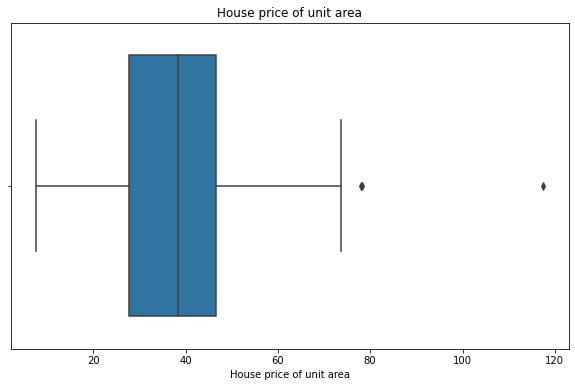

In [6]:
#Checking outliers with the help of sns boxplot
plt.figure(figsize = (10,6))
sns.boxplot(df['House price of unit area'])
plt.title('House price of unit area')
plt.show()

In [7]:
#Make a function which gave upper and lower range of where outliers lying outside this range 
def outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    Lower_range = Q1-(1.5*IQR)
    Upper_range = Q3+(1.5*IQR)
    return Lower_range,Upper_range

In [8]:
Lowersale,uppersale = outliers(df['House price of unit area'])

In [9]:
Lowersale

-0.6500000000000021

In [10]:
uppersale

74.95

In [11]:
#Replace outlier with upper and lower range values
df['House price of unit area'] = np.where(df['House price of unit area']>uppersale,uppersale,df['House price of unit area'])
df['House price of unit area'] = np.where(df['House price of unit area']<Lowersale,Lowersale,df['House price of unit area'])

C:\Users\hb728\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


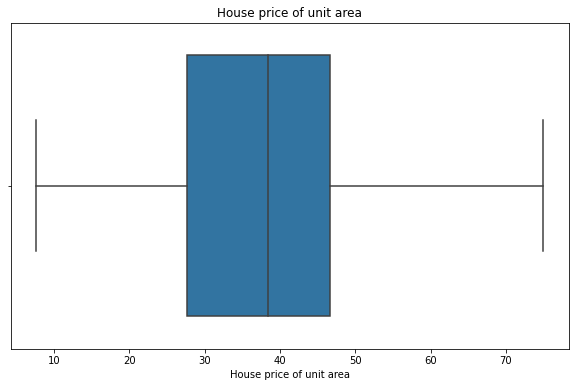

In [12]:
plt.figure(figsize = (10,6))
sns.boxplot(df['House price of unit area'])
plt.title('House price of unit area')
plt.show()

In [13]:
#Unique values in column 'Number of convenience stores'
df['Number of convenience stores'].value_counts()

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

In [14]:
#Unique values in column 'Number of bedrooms'
df['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [15]:
#Visualization of our data

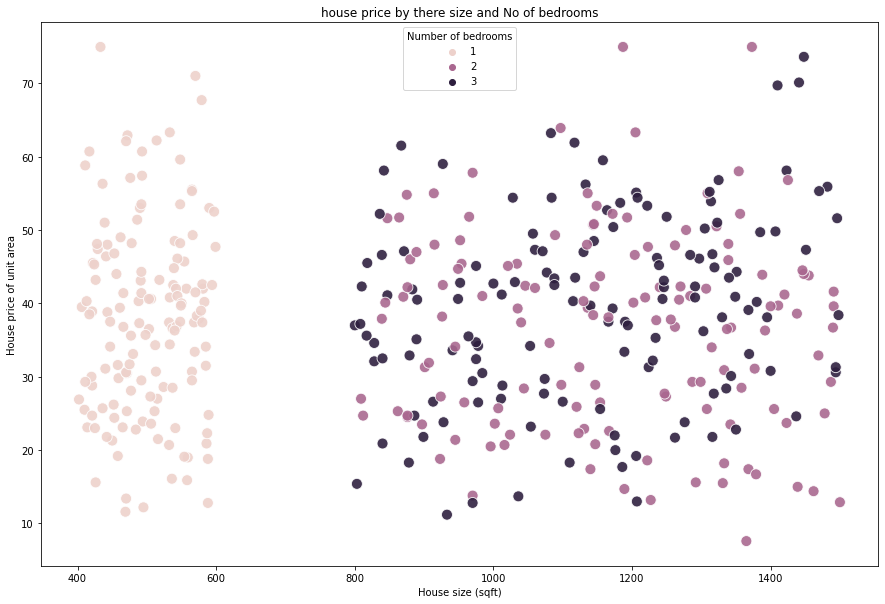

In [16]:
plt.figure(figsize = (15,10))
sns.scatterplot(data =df,x = 'House size (sqft)', y = 'House price of unit area',hue = 'Number of bedrooms',alpha= .89,s = 120)
plt.title('house price by there size and No of bedrooms')
plt.show()

In [17]:
#Correlation of data
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.084420
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.215673
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.693058
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.598823
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.562906
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.543861
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.052715
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.038651
House price of unit area,0.084420,-0.215673,-0.693058,0.598823,0.562906,0.543861,0.052715,0.038651,1.000000


Text(0.5, 1.0, 'Correlation of Dataset')

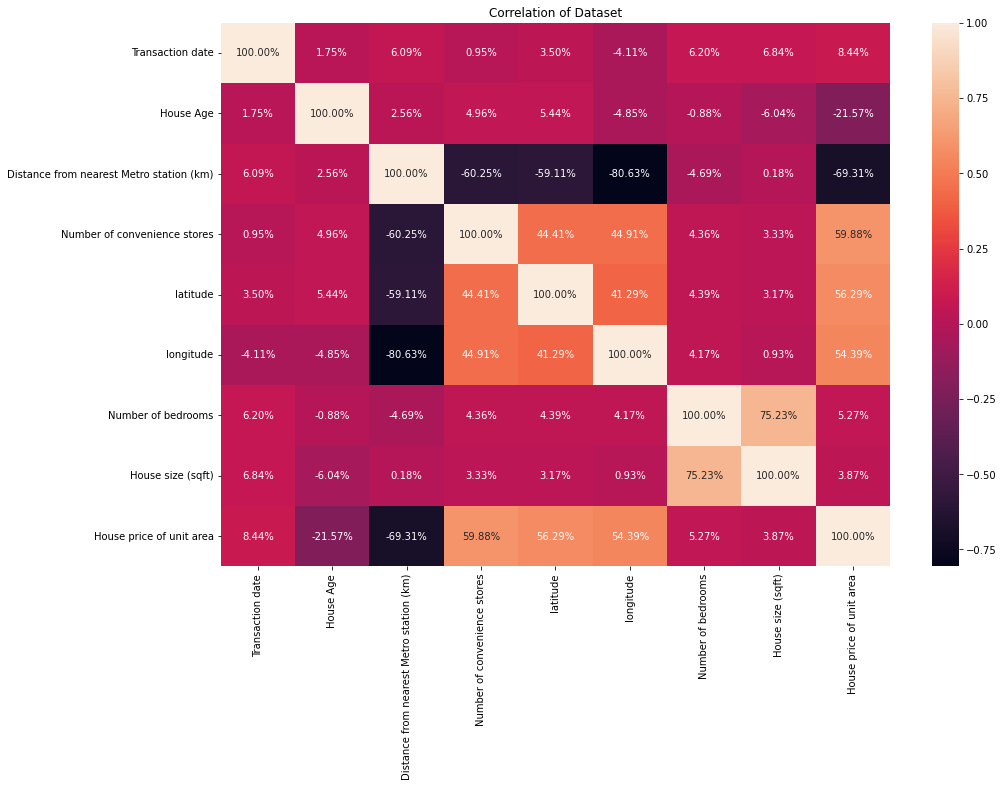

In [18]:
#Heatmap shows correlation of data
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,fmt = '.2%')
plt.title('Correlation of Dataset')

<AxesSubplot:xlabel='Number of convenience stores', ylabel='count'>

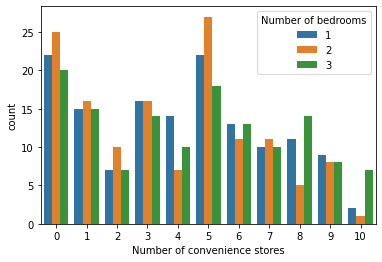

In [19]:
sns.countplot(x = 'Number of convenience stores',data = df,hue = 'Number of bedrooms' )

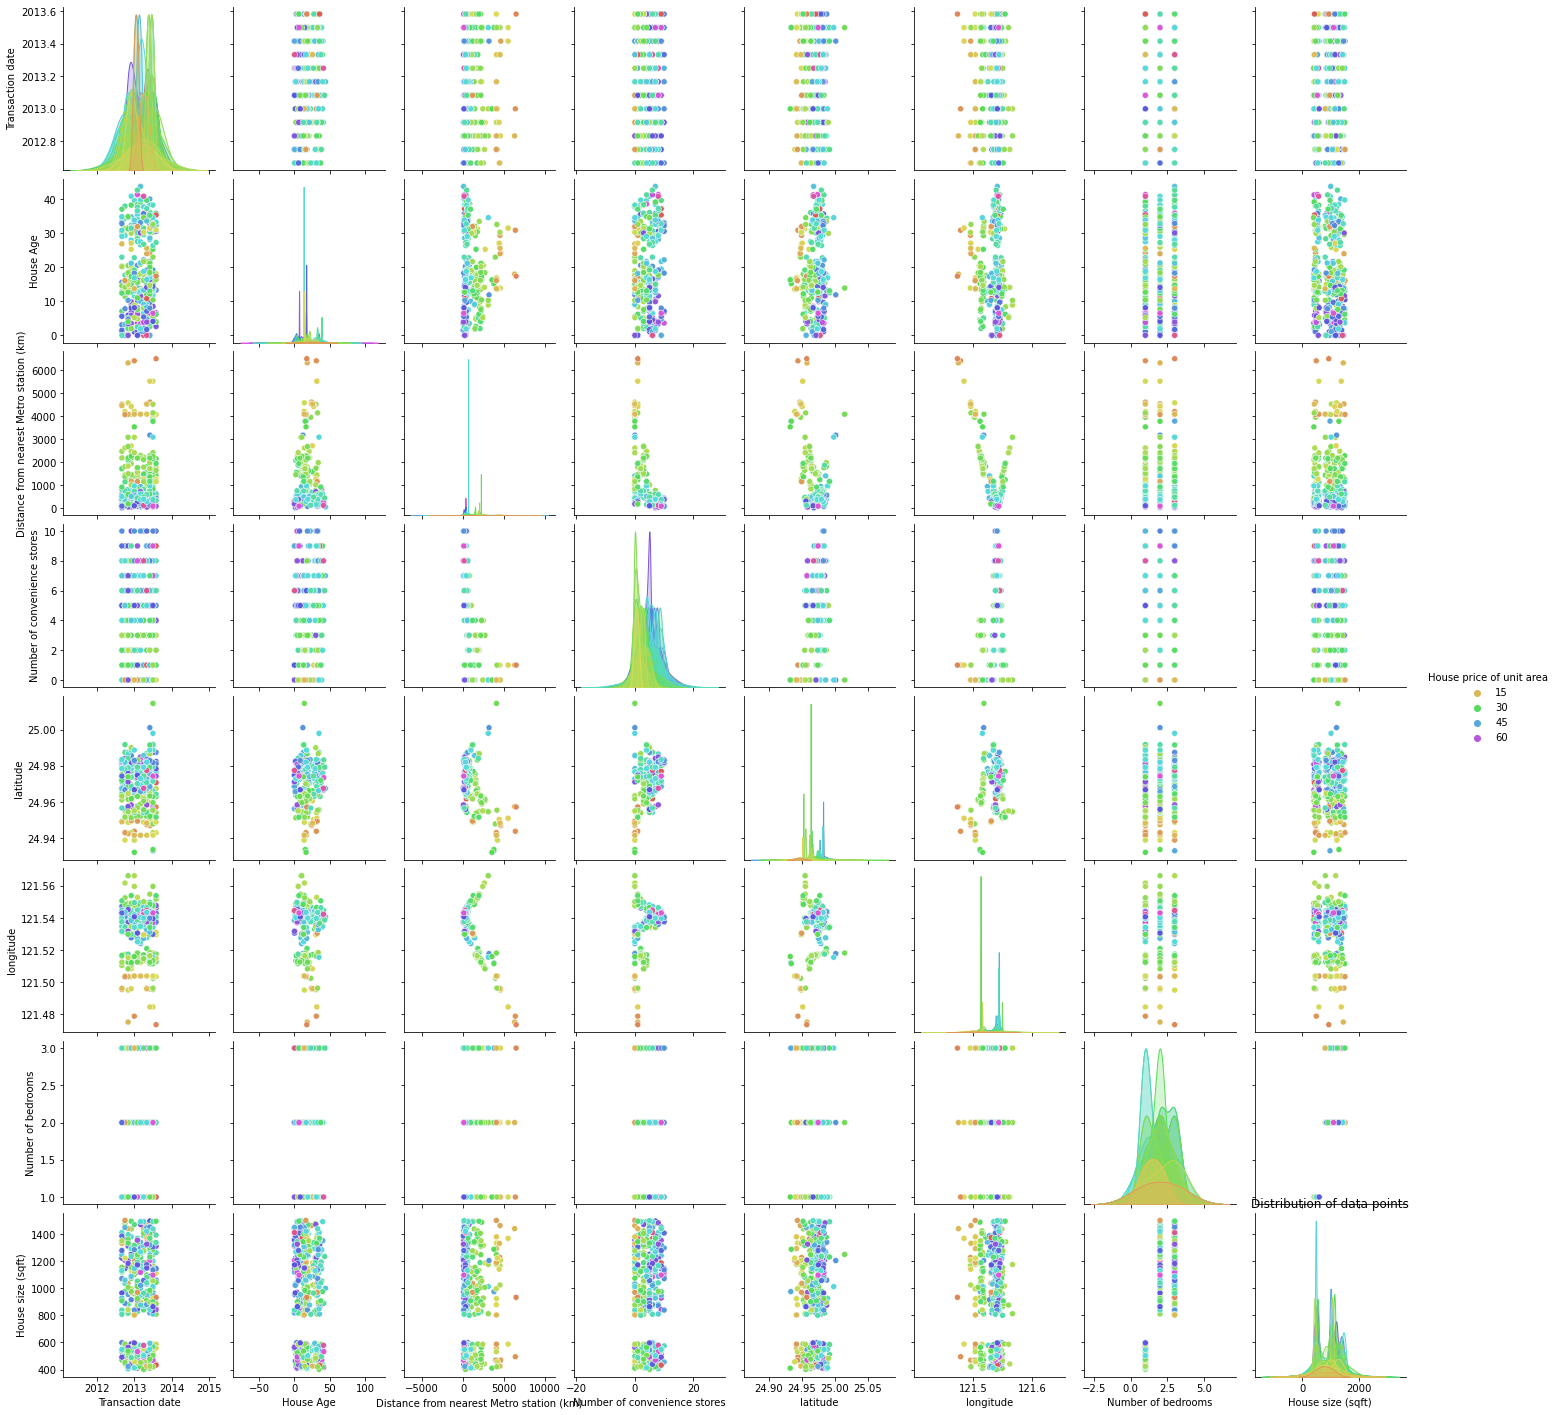

In [20]:
#Making pairpliot of data with target(House price of unit area) which show relationships between variables within a dataset it will helpful to select algorithum for our prediction
sns.pairplot(df,hue = "House price of unit area",palette = 'hls')
plt.title('Distribution of data points')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [22]:
#Changing the data type of 'Transaction date' columns from float to datetime
df['Transaction date'] =  pd.to_datetime(df['Transaction date'])

In [23]:
#Define a function to Get years as in separate column from "Transaction date" and drop 'Transaction date'
def get_year(df):
    df['Transaction year'] = df['Transaction date'].dt.year
    df.drop(columns = ['Transaction date'],inplace  = True)
    return df

In [24]:
#Call the function in our dataset 
df = get_year(df)

In [25]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Transaction year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,1970
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,1970
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,1970
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,1970
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,1970


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
 8   Transaction year                          414 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 29.2 KB


In [27]:
#Separate dependent variable(target) values 
y = df.iloc[:,7].values

In [28]:
#Separate independent variable values
x = df.drop(columns = 'House price of unit area').values

In [29]:
#Using StandardSscaler to standardise So we get more accuracy in our prediction
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler()

In [30]:
#Fiting StandardScaler on our data
x = sc.fit_transform(x)


In [31]:
#Using linearregression algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
#For spliting our data into training and testing
from sklearn.model_selection import train_test_split

In [33]:
#Regression score function.
from sklearn.metrics import r2_score

In [34]:
#We use gradient boost to get best score for our model
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    lr.fit(x_train, y_train)
    y_pred=lr.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [35]:
np.argmax(scores)

78

In [36]:
scores[np.argmax(scores)]

0.768926027325814

In [37]:
#Get maximum score with the heip of gradient boost
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
r2_lr=r2_score(y_test,y_pred)
r2_lr

0.768926027325814

In [38]:
#Using RandomForestRegressor algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    rfr.fit(x_train, y_train)
    y_pred=rfr.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [ ]:
np.argmax(scores)

In [ ]:
scores[np.argmax(scores)]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
r2_rfr=r2_score(y_test,y_pred)
r2_rfr

In [ ]:
#using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [ ]:
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=i)
    dtr = DecisionTreeRegressor(random_state = 0)
    dtr.fit(x_train, y_train)
    y_pred=dtr.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [ ]:
np.argmax(scores)

In [ ]:
scores[np.argmax(scores)]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=np.argmax(scores))
dtr.fit(x_train, y_train)
y_pred=dtr.predict(x_test)
r2_dtr=r2_score(y_test,y_pred)
r2_dtr

In [ ]:
#Using tabulate to make table
from tabulate import tabulate

In [ ]:
#Giving table value(score of all algorithm) to coparison 
table = []
table.append(['Sr.No.', 'Model', 'R-squared value'])
table.append(['1', 'Linear Regression', r2_lr])
table.append(['2', 'Decision Tree Regression', r2_dtr])
table.append(['3', 'Random Forest Regression', r2_rfr])

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
#I recommend the rendom forest regressor because as we can see in pairplot there is overfitting
y_pred_rfr = rfr.predict(x_test)

In [ ]:
y_pred_rfr

In [ ]:
#Difference between actual and priction values
y_test - y_pred